<a href="https://colab.research.google.com/github/su763/type/blob/main/Housing_Price_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- 1. Data Loading ---
Dataset shape: (20640, 9)
Features: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Target variable: MedHouseVal (Median House Value)

First 5 rows of the data:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  

--- 2. Data Preprocessing and Splitting ---
Training set size: 16512 samples
Testing set size: 4128 samples

--- 3. Training Linear Regres

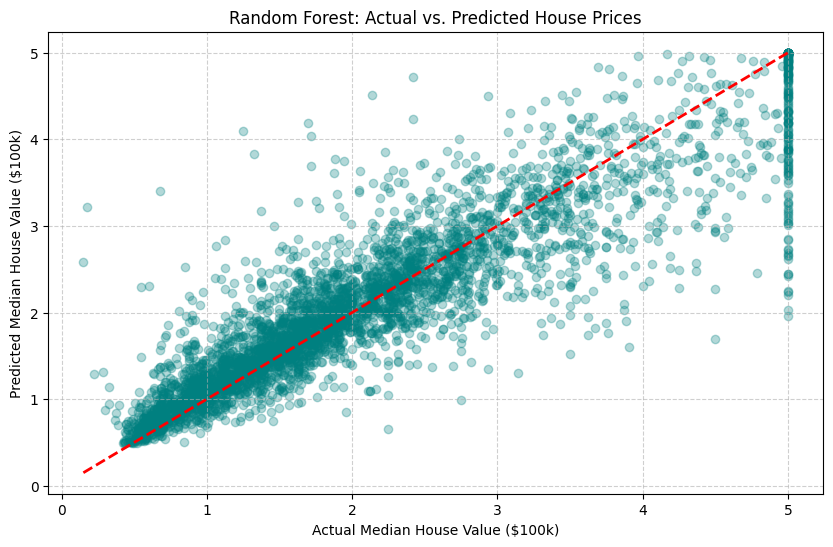


Project complete. Save this notebook to GitHub using File > Save a copy in GitHub.


In [1]:
# Data Science Project: California Housing Price Prediction (Regression)
# This code is designed to run in a Google Colab notebook environment.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# --- 1. Data Loading and Inspection ---
print("--- 1. Data Loading ---")

# Load the California Housing dataset (built-in to scikit-learn)
# This avoids needing to manually download files.
housing = fetch_california_housing(as_frame=True)
df = housing.frame

# Display basic information
print(f"Dataset shape: {df.shape}")
print(f"Features: {housing.feature_names}")
print(f"Target variable: {housing.target_names[0]} (Median House Value)")
print("\nFirst 5 rows of the data:")
print(df.head())

# Define features (X) and target (y)
X = df.drop(columns=[housing.target_names[0]])
y = df[housing.target_names[0]]

# --- 2. Data Preprocessing and Splitting ---
print("\n--- 2. Data Preprocessing and Splitting ---")

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

# Standardize features (important for many ML algorithms like Linear Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- 3. Model Training (Model 1: Linear Regression) ---
print("\n--- 3. Training Linear Regression Model ---")

lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
lr_predictions = lr_model.predict(X_test_scaled)

# --- 4. Model Training (Model 2: Random Forest Regressor) ---
# Random Forest is often more accurate but slower to train
print("\n--- 4. Training Random Forest Model (This might take a moment) ---")

rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train_scaled, y_train)
rf_predictions = rf_model.predict(X_test_scaled)

# --- 5. Model Evaluation ---
print("\n--- 5. Model Evaluation Metrics ---")

def evaluate_model(y_true, y_pred, model_name):
    """Calculates and prints key regression metrics."""
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    print(f"\n--- Results for {model_name} ---")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"R-squared (R2 Score): {r2:.4f}") # R2 close to 1 is best

# Evaluate Linear Regression
evaluate_model(y_test, lr_predictions, "Linear Regression")

# Evaluate Random Forest Regressor
evaluate_model(y_test, rf_predictions, "Random Forest Regressor")


# --- 6. Visualization: Actual vs. Predicted (Random Forest) ---
# Use Random Forest as it typically performs better
print("\n--- 6. Generating Scatter Plot (Actual vs. Predicted) ---")
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_predictions, alpha=0.3, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Median House Value ($100k)")
plt.ylabel("Predicted Median House Value ($100k)")
plt.title("Random Forest: Actual vs. Predicted House Prices")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

print("\nProject complete. Save this notebook to GitHub using File > Save a copy in GitHub.")